In [50]:
#usual procedure...
%load_ext autoreload
%autoreload 2
import matplotlib.pyplot as plt
import numpy as np
from nuflux import detgeo as dg
import pandas as pd

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [54]:
data1 = dg.load_data('mucols2numu.txt', n_events = 1e5, direc = 'GENANA') #this is my variable for the directory in which my .txt files are.
data2 = dg.load_data('mucols2nue.txt', n_events = 1e5, direc = 'GENANA')
data = pd.concat([data1, data2], axis = 0)

Loading generated data for a MuCoL (s2) experiment;
It includes interactions from ν_μ, anti ν_μ within the MD, SB, SM, HC, EC, NO of the muon detector.
Adding weights...
Done!
Loading generated data for a MuCoL (s2) experiment;
It includes interactions from ν_e, anti ν_e within the MD, SB, SM, HC, EC, NO of the muon detector.
Adding weights...
Done!


In [58]:
data = dg.load_data('muTs.txt', n_events = 1e5, direc = 'GENANA')

Loading generated data for a μTRISTAN (s) experiment;
It includes interactions from ν_e, anti ν_μ within the MD, SB, SM, HC, EC, NO of the muon detector.
Adding weights...
Done!


In [59]:
mus = (data[(data['Name'] == 'mu+') | (data['Name'] == 'mu-')])
es = (data[(data['Name'] == 'e-') | (data['Name'] == 'e+')])

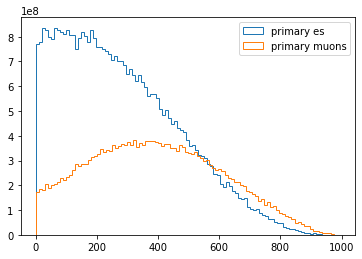

In [60]:
plt.hist(es['E'], weights = es['w'], bins = 100, histtype = 'step', label = 'primary es')
plt.hist(mus['E'], weights = mus['w'], bins = 100, histtype = 'step', label = 'primary muons')
plt.legend()

In [2]:
sim = SimulateDetector(param = 'mutristan l', N_evals = 1e6)

Succesfully simulated decays:
μTRISTAN (L) parameter set with 1.000e+06 evaluations .
1.853e+06 MC generations; took 39.2 s.


In [3]:
sim.run(collision = 'mu+e-', Lss = 12)

Successfully simulated neutrino event rates within Det v2:
μTRISTAN (L) (μ+e-) at L = 0.12 m.
Total count: 4.60e+11 events; took 45.3 s (numba pre-compilation needed).

Event Distribution:
 +----------------------+-------------------+------------------------+--------------+
|    Detector Parts    | ν_e events (left) | anti ν_μ events (left) | Total Events |
+----------------------+-------------------+------------------------+--------------+
|   muon_detector_ec   |     5.407e+10     |       3.257e+10        |  8.665e+10   |
| muon_detector_barrel |     3.921e+10     |       2.344e+10        |  6.266e+10   |
|   solenoid_borders   |     1.802e+09     |       1.094e+09        |  2.896e+09   |
|     solenoid_mid     |     2.608e+09     |       1.552e+09        |  4.160e+09   |
|       hcal_ec        |     3.229e+10     |       1.958e+10        |  5.188e+10   |
|     hcal_barrel      |     1.868e+10     |       1.124e+10        |  2.992e+10   |
|       ecal_ec        |     4.739e+09     | 

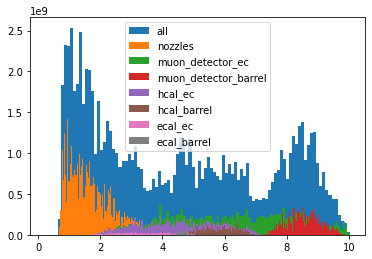

In [46]:
part = 'numubar'
sec = 'nozzles'
sec1 = 'muon_detector_ec'
sec2 = 'muon_detector_barrel'
sec3 = 'hcal_ec'
sec4 = 'hcal_barrel'
sec5 = 'ecal_ec'
sec6 = 'ecal_barrel'
plt.hist(np.arccos(sim.get_data(part = part, sec = 'all')[6]) * 180/np.pi, weights = sim.get_data(part = part, sec = 'all')[3], bins = 100, label = 'all')
plt.hist(np.arccos(sim.get_data(part = part, sec = sec)[6]) * 180/np.pi, weights = sim.get_data(part = part, sec = sec)[3], bins = 100, label = sec)
plt.hist(np.arccos(sim.get_data(part = part, sec = sec1)[6]) * 180/np.pi, weights = sim.get_data(part = part, sec = sec1)[3], bins = 100, label = sec1)
plt.hist(np.arccos(sim.get_data(part = part, sec = sec2)[6]) * 180/np.pi, weights = sim.get_data(part = part, sec = sec2)[3], bins = 100, label = sec2)
plt.hist(np.arccos(sim.get_data(part = part, sec = sec3)[6]) * 180/np.pi, weights = sim.get_data(part = part, sec = sec3)[3], bins = 100, label = sec3)
plt.hist(np.arccos(sim.get_data(part = part, sec = sec4)[6]) * 180/np.pi, weights = sim.get_data(part = part, sec = sec4)[3], bins = 100, label = sec4)
plt.hist(np.arccos(sim.get_data(part = part, sec = sec5)[6]) * 180/np.pi, weights = sim.get_data(part = part, sec = sec5)[3], bins = 100, label = sec5)
plt.hist(np.arccos(sim.get_data(part = part, sec = sec6)[6]) * 180/np.pi, weights = sim.get_data(part = part, sec = sec6)[3], bins = 100, label = sec6)
plt.legend()

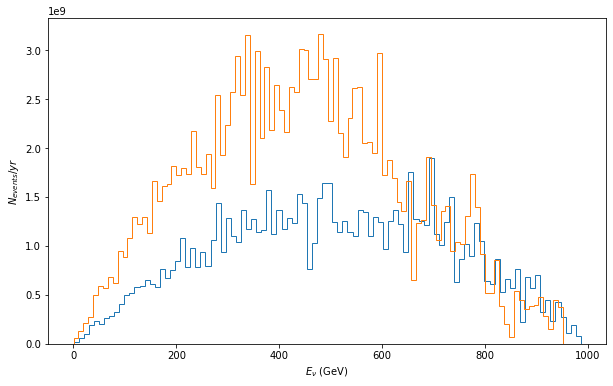

In [5]:
sim.energies(part = 'numubar', fs = (10,6))
sim.energies(part = 'nue', fs = None)

In [ ]:
spline_12_1000260560,spline_12_1000741820,spline_12_1000290630,spline_12_1000140280,spline_12_1000130270,spline_12_1000060120

In [6]:
sim.get_GENIE_flux('mutristan_s12_nue', part = 'nue')

Data has been written to fluxes/mutristan_s12_nue.data.


In [ ]:
#gevgen -o newevents.ghep.root -n 10000 -e 0.1,999 -p -14 -t 1000260560[0.84],1000130270[0.03],1000290630[0.004],1000060120[0.126] -f $FLUXES/mutristan_s12_numubar.data --cross-sections $GENIE_SMALL_XSEC --seed 1234#
#gevgen -o newevents.ghep.root -n 10000 -e 0.1,9999 -p -14 -t 1000260560[0.84],1000130270[0.03],1000290630[0.004],1000060120[0.126] -f $FLUXES/mutristan_l12_numubar.data --cross-sections $GENIEXS/custom_10TeV.xml --seed 1234
# Fe works. Al works. Cu works. O works. H works. W works. Si works. C works.
# 1000260560,1000130270,1000290630,1000060120,1000741820,1000140280
'''
MD = 1000260560 (Fe)
Solenoid Borders = 1000260560 (Fe)
Solenoid Mid = 1000130270 (Al)
HCal = 1000260560[0.84],1000130270[0.03],1000290630[0.004],1000060120[0.126] (Fe, Al, Cu, C)
Ecal = 1000741820[0.404],1000290630[0.489],1000140280[0.107] (W, Cu, Si)
Nozzles = 1000741820 (W)
'''

In [ ]:
problems:
#mokhov_EC_nuebar.ghep.root
muTs_EC_nue.ghep.root
#gevgen -o muTs_EC_nue.ghep.root -n 100000 -e 0.1,9999 -p 12 -t 1000741820[0.404],1000290630[0.489],1000140280[0.107] -f $FLUXES/mutristan_s12_nue.data --cross-sections $GENIEXS/custom_10TeV.xml

muTs_MD_numubar.ghep.root
#gevgen -o muTs_MD_numubar.ghep.root -n 100000 -e 0.1,9999 -p -14 -t 1000260560 -f $FLUXES/mutristan_s12_numubar.data --cross-sections $GENIEXS/custom_10TeV.xml

muTs_NO_nue.ghep.root
#gevgen -o muTs_NO_nue.ghep.root -n 100000 -e 0.1,9999 -p 12 -t 1000741820 -f $FLUXES/mutristan_s12_nue.data --cross-sections $GENIEXS/custom_10TeV.xml

muTs_SB_numubar.ghep.root
#gevgen -o muTs_SB_numubar.ghep.root -n 100000 -e 0.1,9999 -p -14 -t 1000260560 -f $FLUXES/mutristan_s12_numubar.data --cross-sections $GENIEXS/custom_10TeV.xml

In [ ]:
#gevgen -o mucols2_MD_nue.ghep.root -n 100000 -e 0.1,9999 -p 12 -t 1000260560 -f $FLUXES/mucol_s2100_nue.data --cross-sections $GENIEXS/custom_10TeV.xml
#gevgen -o mucols2_MD_nuebar.ghep.root -n 100000 -e 0.1,9999 -p -12 -t 1000260560 -f $FLUXES/mucol_s2100_nuebar.data --cross-sections $GENIEXS/custom_10TeV.xml
#gevgen -o mucols2_MD_numu.ghep.root -n 100000 -e 0.1,9999 -p 14 -t 1000260560 -f $FLUXES/mucol_s2100_numu.data --cross-sections $GENIEXS/custom_10TeV.xml
#gevgen -o mucols2_MD_numubar.ghep.root -n 100000 -e 0.1,9999 -p -14 -t 1000260560 -f $FLUXES/mucol_s2100_numubar.data --cross-sections $GENIEXS/custom_10TeV.xml

#gevgen -o mucols2_SB_nue.ghep.root -n 100000 -e 0.1,9999 -p 12 -t 1000260560 -f $FLUXES/mucol_s2100_nue.data --cross-sections $GENIEXS/custom_10TeV.xml
#gevgen -o mucols2_SB_nuebar.ghep.root -n 100000 -e 0.1,9999 -p -12 -t 1000260560 -f $FLUXES/mucol_s2100_nuebar.data --cross-sections $GENIEXS/custom_10TeV.xml
#gevgen -o mucols2_SB_numu.ghep.root -n 100000 -e 0.1,9999 -p 14 -t 1000260560 -f $FLUXES/mucol_s2100_numu.data --cross-sections $GENIEXS/custom_10TeV.xml
#gevgen -o mucols2_SB_numubar.ghep.root -n 100000 -e 0.1,9999 -p -14 -t 1000260560 -f $FLUXES/mucol_s2100_numubar.data --cross-sections $GENIEXS/custom_10TeV.xml

#gevgen -o mucols2_SM_nue.ghep.root -n 100000 -e 0.1,9999 -p 12 -t 1000130270 -f $FLUXES/mucol_s2100_nue.data --cross-sections $GENIEXS/custom_10TeV.xml
#gevgen -o mucols2_SM_nuebar.ghep.root -n 100000 -e 0.1,9999 -p -12 -t 1000130270 -f $FLUXES/mucol_s2100_nuebar.data --cross-sections $GENIEXS/custom_10TeV.xml
#gevgen -o mucols2_SM_numu.ghep.root -n 100000 -e 0.1,9999 -p 14 -t 1000130270 -f $FLUXES/mucol_s2100_numu.data --cross-sections $GENIEXS/custom_10TeV.xml
#gevgen -o mucols2_SM_numubar.ghep.root -n 100000 -e 0.1,9999 -p -14 -t 1000130270 -f $FLUXES/mucol_s2100_numubar.data --cross-sections $GENIEXS/custom_10TeV.xml

#gevgen -o mucols2_HC_nue.ghep.root -n 100000 -e 0.1,9999 -p 12 -t 1000260560[0.84],1000130270[0.03],1000290630[0.004],1000060120[0.126] -f $FLUXES/mucol_s2100_nue.data --cross-sections $GENIEXS/custom_10TeV.xml
#gevgen -o mucols2_HC_nuebar.ghep.root -n 100000 -e 0.1,9999 -p -12 -t 1000260560[0.84],1000130270[0.03],1000290630[0.004],1000060120[0.126] -f $FLUXES/mucol_s2100_nuebar.data --cross-sections $GENIEXS/custom_10TeV.xml
#gevgen -o mucols2_HC_numu.ghep.root -n 100000 -e 0.1,9999 -p 14 -t 1000260560[0.84],1000130270[0.03],1000290630[0.004],1000060120[0.126] -f $FLUXES/mucol_s2100_numu.data --cross-sections $GENIEXS/custom_10TeV.xml
#gevgen -o mucols2_HC_numubar.ghep.root -n 100000 -e 0.1,9999 -p -14 -t 1000260560[0.84],1000130270[0.03],1000290630[0.004],1000060120[0.126] -f $FLUXES/mucol_s2100_numubar.data --cross-sections $GENIEXS/custom_10TeV.xml

#gevgen -o mucols2_EC_nue.ghep.root -n 100000 -e 0.1,9999 -p 12 -t 1000741820[0.404],1000290630[0.489],1000140280[0.107] -f $FLUXES/mucol_s2100_nue.data --cross-sections $GENIEXS/custom_10TeV.xml
#gevgen -o mucols2_EC_nuebar.ghep.root -n 100000 -e 0.1,9999 -p -12 -t 1000741820[0.404],1000290630[0.489],1000140280[0.107] -f $FLUXES/mucol_s2100_nuebar.data --cross-sections $GENIEXS/custom_10TeV.xml
#gevgen -o mucols2_EC_numu.ghep.root -n 100000 -e 0.1,9999 -p 14 -t 1000741820[0.404],1000290630[0.489],1000140280[0.107] -f $FLUXES/mucol_s2100_numu.data --cross-sections $GENIEXS/custom_10TeV.xml
#gevgen -o mucols2_EC_numubar.ghep.root -n 100000 -e 0.1,9999 -p -14 -t 1000741820[0.404],1000290630[0.489],1000140280[0.107] -f $FLUXES/mucol_s2100_numubar.data --cross-sections $GENIEXS/custom_10TeV.xml

#gevgen -o mucols2_NO_nue.ghep.root -n 100000 -e 0.1,9999 -p 12 -t 1000741820 -f $FLUXES/mucol_s2100_nue.data --cross-sections $GENIEXS/custom_10TeV.xml
#gevgen -o mucols2_NO_nuebar.ghep.root -n 100000 -e 0.1,9999 -p -12 -t 1000741820 -f $FLUXES/mucol_s2100_nuebar.data --cross-sections $GENIEXS/custom_10TeV.xml
#gevgen -o mucols2_NO_numu.ghep.root -n 100000 -e 0.1,9999 -p 14 -t 1000741820 -f $FLUXES/mucol_s2100_numu.data --cross-sections $GENIEXS/custom_10TeV.xml
#gevgen -o mucols2_NO_numubar.ghep.root -n 100000 -e 0.1,9999 -p -14 -t 1000741820 -f $FLUXES/mucol_s2100_numubar.data --cross-sections $GENIEXS/custom_10TeV.xml

In [ ]:
#gevgen -o mokhov_MD_nue.ghep.root -n 100000 -e 0.1,9999 -p 12 -t 1000260560 -f $FLUXES/mokhov_50_nue.data --cross-sections $GENIEXS/custom_10TeV.xml
#gevgen -o mokhov_MD_nuebar.ghep.root -n 100000 -e 0.1,9999 -p -12 -t 1000260560 -f $FLUXES/mokhov_50_nuebar.data --cross-sections $GENIEXS/custom_10TeV.xml
#gevgen -o mokhov_MD_numu.ghep.root -n 100000 -e 0.1,9999 -p 14 -t 1000260560 -f $FLUXES/mokhov_50_numu.data --cross-sections $GENIEXS/custom_10TeV.xml
#gevgen -o mokhov_MD_numubar.ghep.root -n 100000 -e 0.1,9999 -p -14 -t 1000260560 -f $FLUXES/mokhov_50_numubar.data --cross-sections $GENIEXS/custom_10TeV.xml

#gevgen -o mokhov_SB_nue.ghep.root -n 100000 -e 0.1,9999 -p 12 -t 1000260560 -f $FLUXES/mokhov_50_nue.data --cross-sections $GENIEXS/custom_10TeV.xml
#gevgen -o mokhov_SB_nuebar.ghep.root -n 100000 -e 0.1,9999 -p -12 -t 1000260560 -f $FLUXES/mokhov_50_nuebar.data --cross-sections $GENIEXS/custom_10TeV.xml
#gevgen -o mokhov_SB_numu.ghep.root -n 100000 -e 0.1,9999 -p 14 -t 1000260560 -f $FLUXES/mokhov_50_numu.data --cross-sections $GENIEXS/custom_10TeV.xml
#gevgen -o mokhov_SB_numubar.ghep.root -n 100000 -e 0.1,9999 -p -14 -t 1000260560 -f $FLUXES/mokhov_50_numubar.data --cross-sections $GENIEXS/custom_10TeV.xml

#gevgen -o mokhov_SM_nue.ghep.root -n 100000 -e 0.1,9999 -p 12 -t 1000130270 -f $FLUXES/mokhov_50_nue.data --cross-sections $GENIEXS/custom_10TeV.xml
#gevgen -o mokhov_SM_nuebar.ghep.root -n 100000 -e 0.1,9999 -p -12 -t 1000130270 -f $FLUXES/mokhov_50_nuebar.data --cross-sections $GENIEXS/custom_10TeV.xml
#gevgen -o mokhov_SM_numu.ghep.root -n 100000 -e 0.1,9999 -p 14 -t 1000130270 -f $FLUXES/mokhov_50_numu.data --cross-sections $GENIEXS/custom_10TeV.xml
#gevgen -o mokhov_SM_numubar.ghep.root -n 100000 -e 0.1,9999 -p -14 -t 1000130270 -f $FLUXES/mokhov_50_numubar.data --cross-sections $GENIEXS/custom_10TeV.xml

#gevgen -o mokhov_NO_nue.ghep.root -n 100000 -e 0.1,9999 -p 12 -t 1000741820 -f $FLUXES/mokhov_50_nue.data --cross-sections $GENIEXS/custom_10TeV.xml
#gevgen -o mokhov_NO_nuebar.ghep.root -n 100000 -e 0.1,9999 -p -12 -t 1000741820 -f $FLUXES/mokhov_50_nuebar.data --cross-sections $GENIEXS/custom_10TeV.xml
#gevgen -o mokhov_NO_numu.ghep.root -n 100000 -e 0.1,9999 -p 14 -t 1000741820 -f $FLUXES/mokhov_50_numu.data --cross-sections $GENIEXS/custom_10TeV.xml
#gevgen -o mokhov_NO_numubar.ghep.root -n 100000 -e 0.1,9999 -p -14 -t 1000741820 -f $FLUXES/mokhov_50_numubar.data --cross-sections $GENIEXS/custom_10TeV.xml


In [13]:
os.system('source ~/.bashrc')

0

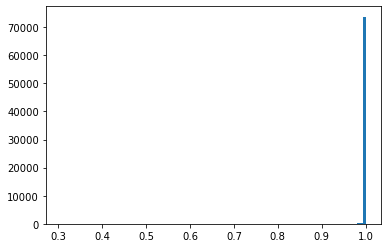

In [3]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Ensure environment variable is set
os.system('source ~/.bashrc')
directory = os.getenv('GENANA')

if directory is None:
    raise ValueError("Environment variable GENANA is not set. Ensure it's defined in your .bashrc and loaded correctly.")
    
filename = os.path.join(directory, 'lol.txt')

# Read the file into a DataFrame, assuming space-separated columns
data = pd.read_csv(filename, delim_whitespace=True, skiprows = 5)  # Skips header row
# Extract the column of interest (adjust column index if needed)
pmag = np.sqrt(data['px'].to_numpy()**2 +  data['py'].to_numpy()**2 + data['pz'].to_numpy()**2) # Assuming the second column
cost = data['pz'].to_numpy() / pmag
plt.hist(cost, bins = 100)
plt.show()

In [34]:
cost

array([nan, nan, nan, ..., nan, nan, nan])

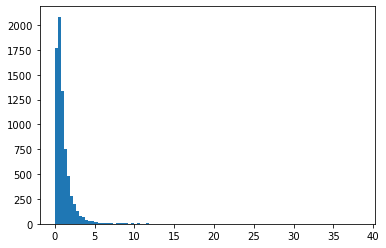

In [36]:
cost = np.arccos(cost) *180/np.pi
plt.hist(cost, bins = 100)
plt.show()

In [24]:
print(data)

      Event Name         E     (GeV)        px   (GeV).1  py  (GeV).2  pz  \
0         0  mu+  211.3850  7.823380  0.045262  211.2410 NaN      NaN NaN   
1         1  mu+  344.0500  8.900410  5.542900  343.8910 NaN      NaN NaN   
2         2  mu+  214.8470  0.182959  9.643560  214.6300 NaN      NaN NaN   
3         4  mu+  702.1010 -0.785159  3.986390  702.0890 NaN      NaN NaN   
4         5  mu+  258.8180 -0.018288 -3.885210  258.7880 NaN      NaN NaN   
...     ...  ...       ...       ...       ...       ...  ..      ...  ..   
7399   9993  mu+   68.0255  2.441380  0.480041   67.9799 NaN      NaN NaN   
7400   9994  mu+  214.6040  0.815875  4.292520  214.5600 NaN      NaN NaN   
7401   9995  mu+  303.9030 -0.437296  2.538680  303.8920 NaN      NaN NaN   
7402   9996  mu+  289.9110  0.623377 -0.305820  289.9100 NaN      NaN NaN   
7403   9999  mu+  579.1170 -1.181890 -3.073400  579.1080 NaN      NaN NaN   

      (GeV).3  
0         NaN  
1         NaN  
2         NaN  
3         N

In [2]:
check_mem()

Filename: /n/home06/lbojorquezlopez/BIN_MC/nuflux/detgeo.py

Line #    Mem usage    Increment  Occurrences   Line Contents
    33    213.8 MiB    213.8 MiB           1   @profile
    34                                         def check_mem():
    35                                             '''For memory-consuming-checking processes.'''
    36    213.8 MiB      0.0 MiB           1       z = 1+2
    37    213.8 MiB      0.0 MiB           1       return




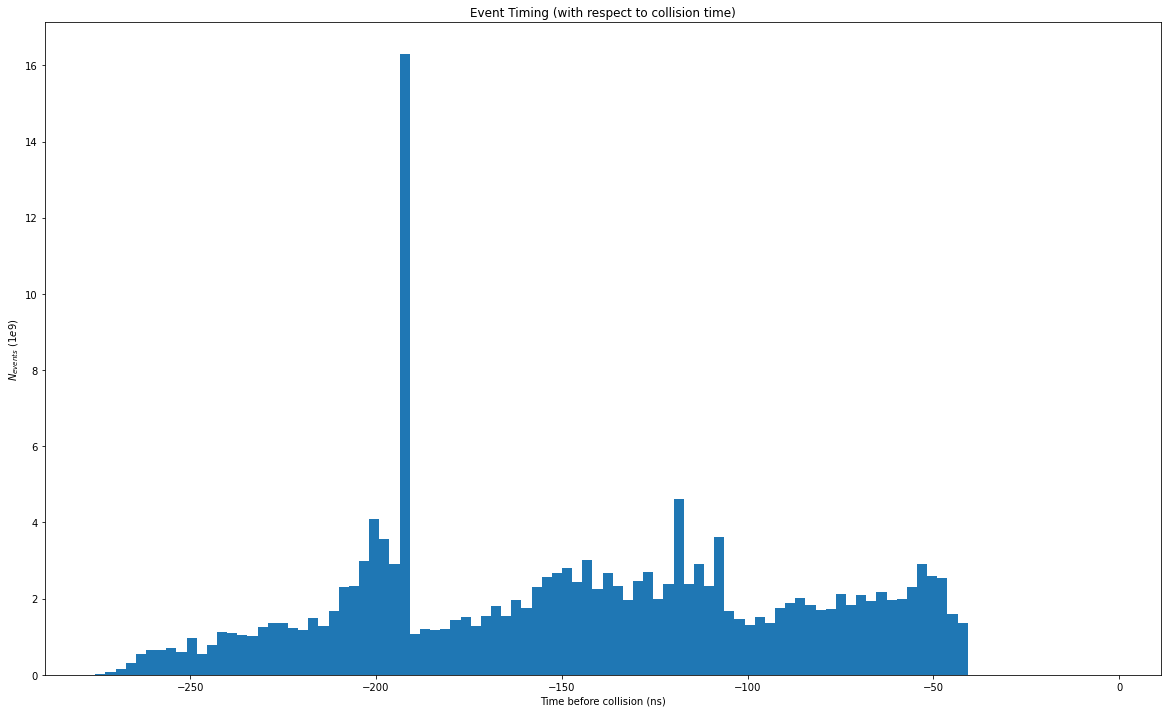

In [65]:
event_timing(sims)

In [66]:
x, y, z, w, time, _ = get_data(sims)

In [70]:
mask = (time > -200e-9) & (time < -180e-9)

(array([2.68776700e+09, 2.25243515e+09, 2.13250445e+09, 1.31254342e+10,
        4.15632508e+09, 6.51940111e+08, 9.23428375e+08, 8.90540385e+08,
        7.48782023e+08, 9.84069282e+08]),
 array([-1.99998909e-07, -1.97999454e-07, -1.95999999e-07, -1.94000545e-07,
        -1.92001090e-07, -1.90001636e-07, -1.88002181e-07, -1.86002726e-07,
        -1.84003272e-07, -1.82003817e-07, -1.80004362e-07]),
 <BarContainer object of 10 artists>)

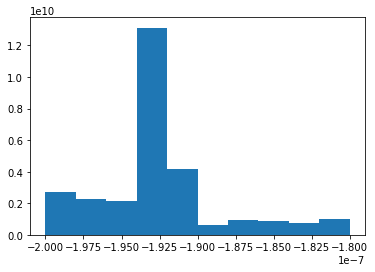

In [71]:
plt.hist(time[mask], weights = w[mask])

In [75]:
mask1 = (time > -1.9275e-07) & (time < -1.92001090e-07)

(array([2.88598854e+08, 5.40239018e+08, 6.59674307e+08, 6.29526240e+08,
        8.80783385e+08, 1.23817009e+09, 1.72783285e+09, 1.67993579e+09,
        2.08115698e+09, 1.69335550e+09]),
 array([-1.92747580e-07, -1.92673109e-07, -1.92598638e-07, -1.92524167e-07,
        -1.92449696e-07, -1.92375225e-07, -1.92300754e-07, -1.92226283e-07,
        -1.92151811e-07, -1.92077340e-07, -1.92002869e-07]),
 <BarContainer object of 10 artists>)

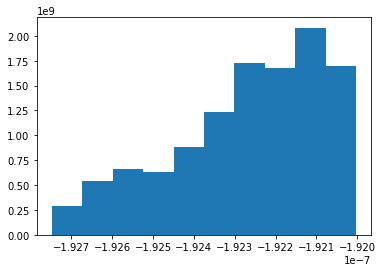

In [76]:
plt.hist(time[mask1], weights = w[mask1])

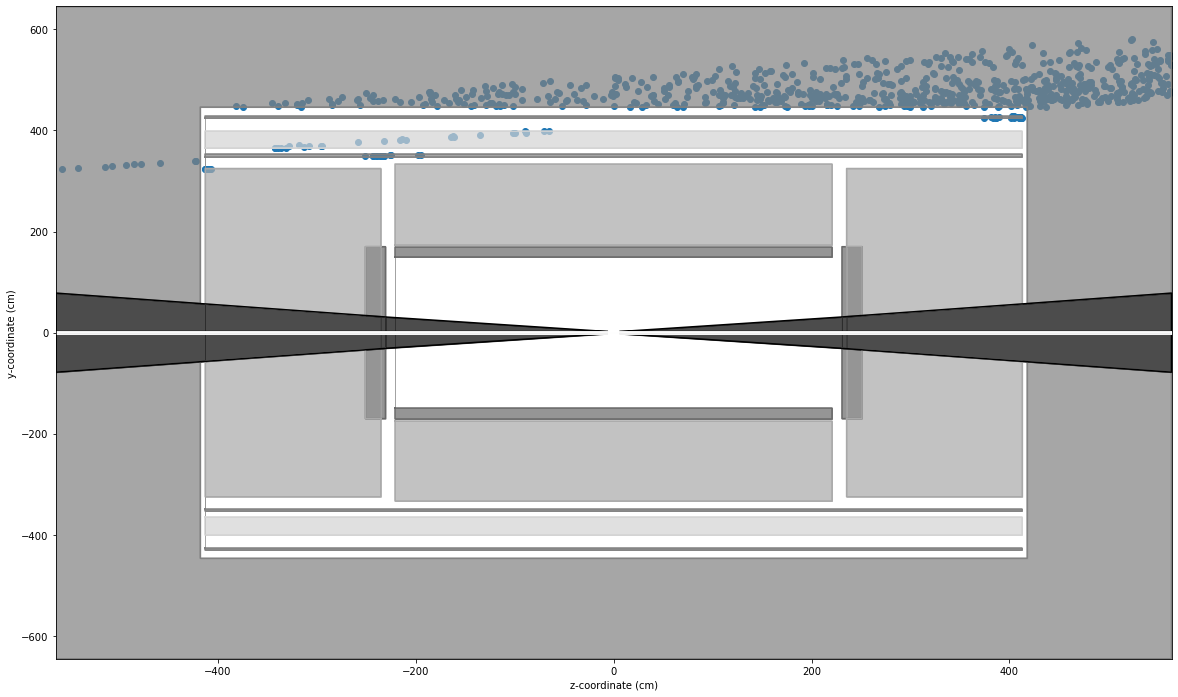

In [77]:
fig, ax = plt.subplots(figsize = (20,12))
ax.scatter(z[mask1], y[mask1])
plot_det('det_v2', ax)

In [4]:
sim.get_GENIE_flux('mutristan_l12_numubar', part = 'numubar')

Data has been written to fluxes/mutristan_l12_numubar.data.
